In [1]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

import folium 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")
microplastics_csv

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,35217,4/6/2005 12:00:00 AM,2.1900,-135.7300,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05
1,36142,2/24/2002 12:00:00 AM,-12.6900,-142.3000,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6fb35a58-21b6-4cce-9dbb-f9c222bc311d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.584076e+07,-1.424337e+06
2,35881,10/25/2010 12:00:00 AM,19.6200,-146.5000,Pacific Ocean,NaN,NaN,0.00216,pieces/m3,0.0005-0.005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,67f360ab-017e-4a86-931b-6f7336c2c206,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.630831e+07,2.228069e+06
3,36474,11/16/2003 12:00:00 AM,18.9700,-143.4700,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,5be50d3b-7343-45f0-ac71-19a3cdc047ea,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.597101e+07,2.151404e+06
4,34553,3/5/2001 12:00:00 AM,19.3800,-74.0900,Atlantic Ocean,Caribbean Sea,NaN,0.00000,pieces/m3,0-0.0005,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,5e54fac6-640b-4445-8fff-94a9498d6168,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-8.247661e+06,2.199726e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11301,37329,11/28/2014 12:00:00 AM,15.5034,-52.4550,Atlantic Ocean,NaN,NaN,0.00200,pieces/m3,0.0005-0.005,...,211009,https://www.ncei.noaa.gov/access/metadata/land...,6084e526-1912-4ee3-95ae-de0f245d6ac8,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",-5.839264e+06,1.747284e+06
11302,36788,12/11/2014 12:00:00 AM,15.3929,-57.7041,Atlantic Ocean,NaN,NaN,0.02500,pieces/m3,0.005-1,...,211009,https://www.ncei.noaa.gov/access/metadata/land...,40034069-71ef-4b88-b504-6aa74d855dd3,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",-6.423591e+06,1.734522e+06
11303,29706,11/7/1995 12:00:00 AM,17.3500,-60.2000,Atlantic Ocean,NaN,NaN,0.00864,pieces/m3,0.005-1,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,791c578c-b672-4e4b-a885-0c3fdce11f8d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-6.701433e+06,1.961605e+06
11304,32460,10/31/2001 12:00:00 AM,18.6300,-59.6400,Atlantic Ocean,NaN,NaN,0.01080,pieces/m3,0.005-1,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,46335627-8df0-400e-bef8-7ff0afed6798,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-6.639094e+06,2.111422e+06


In [3]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
clean_microplastics = microplastics_csv[["Date", "Latitude", "Longitude", "Oceans","Regions","Measurement","Unit","Sampling Method"]]
clean_microplastics.head()

,Date,Latitude,Longitude,Oceans,Regions,Measurement,Unit,Sampling Method
0,4/6/2005 12:00:00 AM,2.19,-135.73,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
1,2/24/2002 12:00:00 AM,-12.69,-142.30,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
2,10/25/2010 12:00:00 AM,19.62,-146.50,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net
3,11/16/2003 12:00:00 AM,18.97,-143.47,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
4,3/5/2001 12:00:00 AM,19.38,-74.09,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net


In [4]:
clean_microplastics["Year"] = pd.Series()
clean_microplastics.head()

,Date,Latitude,Longitude,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005 12:00:00 AM,2.19,-135.73,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002 12:00:00 AM,-12.69,-142.30,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010 12:00:00 AM,19.62,-146.50,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003 12:00:00 AM,18.97,-143.47,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001 12:00:00 AM,19.38,-74.09,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,NaN


In [5]:
#cleaning time column
for i in range(len(clean_microplastics["Date"])):
    date_time = clean_microplastics.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics.loc[i,"Date"]=date
clean_microplastics.head()

,Date,Latitude,Longitude,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005,2.19,-135.73,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002,-12.69,-142.30,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010,19.62,-146.50,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003,18.97,-143.47,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001,19.38,-74.09,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,NaN


In [6]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
# clean_microplastics = microplastics_csv[["Date","Oceans","Regions","Measurement","Unit","Sampling Method"]]
# # clean_microplastics["Year"] = pd.Series()
# clean_microplastics

# df = pd.DataFrame({'date': ['2022-01-01', '2022-02-01', '2022-03-01'],
#                    'value': [10, 20, 30]})
# clean_microplastics["Date"] = pd.to_datetime(clean_microplastics["Date"])  # Convert string dates to datetime objects

# Add a new column 'year' with the year of each date
# clean_microplastics["Year"] = clean_microplastics["Date"].dt.year

# print(clean_microplastics.head())

In [7]:
for x in range(len(clean_microplastics["Year"])):
    year_time = clean_microplastics.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics.loc[x,"Year"]=year
clean_microplastics.head()

,Date,Latitude,Longitude,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005,2.19,-135.73,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2005
1,2/24/2002,-12.69,-142.30,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2002
2,10/25/2010,19.62,-146.50,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,2010
3,11/16/2003,18.97,-143.47,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2003
4,3/5/2001,19.38,-74.09,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,2001


In [8]:
sampling_mean = clean_microplastics.groupby(["Sampling Method"]).mean()["Measurement"]
sampling_median = clean_microplastics.groupby(["Sampling Method"]).median()["Measurement"]
sampling_max = clean_microplastics.groupby(["Sampling Method"]).max()["Measurement"]
sampling_min = clean_microplastics.groupby(["Sampling Method"]).min()["Measurement"]

sampling_statistics = pd.DataFrame ({
    "Mean Measurement per Sampling": sampling_mean,
    "Median Measurement per Sampling": sampling_median,
    "Max Measurement per Sampling": sampling_max,
    "Min Measurement per Sampling": sampling_min})

sampling_statistics.head()

,Mean Measurement per Sampling,Median Measurement per Sampling,Max Measurement per Sampling,Min Measurement per Sampling
Sampling Method,,,,
Aluminum bucket,2089.859649,1710.000000,7650.333333,703.0
Grab sample,0.012880,0.005000,0.323000,0.0
Intake seawater,26.730769,27.000000,63.000000,0.0
Manta net,2.887066,1.083789,51.078200,0.0
Neuston net,0.082112,0.002160,49.267784,0.0


In [9]:
# Calculate mean measurement per Ocean
measurement_per_ocean = clean_microplastics.groupby("Oceans")["Measurement"].mean()

# Ocean Statistics
oceans_mean = clean_microplastics.groupby(["Oceans"]).mean()["Measurement"]
oceans_median = clean_microplastics.groupby(["Oceans"]).median()["Measurement"]
oceans_max = clean_microplastics.groupby(["Oceans"]).max()["Measurement"]
oceans_min = clean_microplastics.groupby(["Oceans"]).min()["Measurement"]

oceans_statistics = pd.DataFrame ({
    "Mean Measurement per Oceans": oceans_mean,
    "Median Measurement per Oceans": oceans_median,
    "Max Measurement per Oceans": oceans_max,
    "Min Measurement per Oceans": oceans_min})

oceans_statistics

,Mean Measurement per Oceans,Median Measurement per Oceans,Max Measurement per Oceans,Min Measurement per Oceans
Oceans,,,,
Arctic Ocean,0.030578,0.01750,0.104674,0.0
Atlantic Ocean,16.550686,0.00432,7650.333333,0.0
Pacific Ocean,0.900321,0.00300,51.078200,0.0


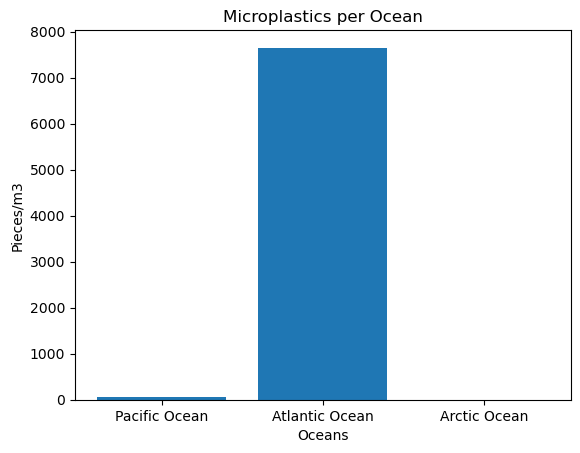

In [10]:
# Create Barplot
plt.bar(clean_microplastics["Oceans"], clean_microplastics["Measurement"])
plt.title("Microplastics per Ocean")
plt.xlabel("Oceans")
plt.ylabel("Pieces/m3")
plt.show()

In [11]:
pacific_df = clean_microplastics[(clean_microplastics["Oceans"] == "Pacific Ocean") & (clean_microplastics["Regions"].notna())]
pacific_df

# Pacific Statistics
pacific_mean = pacific_df.groupby(["Year"]).mean()["Measurement"]
pacific_median = pacific_df.groupby(["Year"]).median()["Measurement"]
pacific_max = pacific_df.groupby(["Year"]).max()["Measurement"]
pacific_min = pacific_df.groupby(["Year"]).min()["Measurement"]

pacific_statistics = pd.DataFrame ({
    "Mean Measurement Pacific Ocean": pacific_mean,
    "Median Measurement Pacific Ocean": pacific_median,
    "Max Measurement Pacific Ocean": pacific_max,
    "Min Measurement Pacific Ocean": pacific_min})

pacific_statistics

,Mean Measurement Pacific Ocean,Median Measurement Pacific Ocean,Max Measurement Pacific Ocean,Min Measurement Pacific Ocean
Year,,,,
2001,0.005940,0.00324,0.01728,0.000
2002,0.016552,0.00000,0.35514,0.000
2013,0.016250,0.01050,0.07100,0.001
2014,0.007433,0.00250,0.06600,0.000
2015,0.005667,0.00500,0.02600,0.000
2016,0.004667,0.00400,0.01300,0.000
2017,0.039333,0.03700,0.04500,0.036


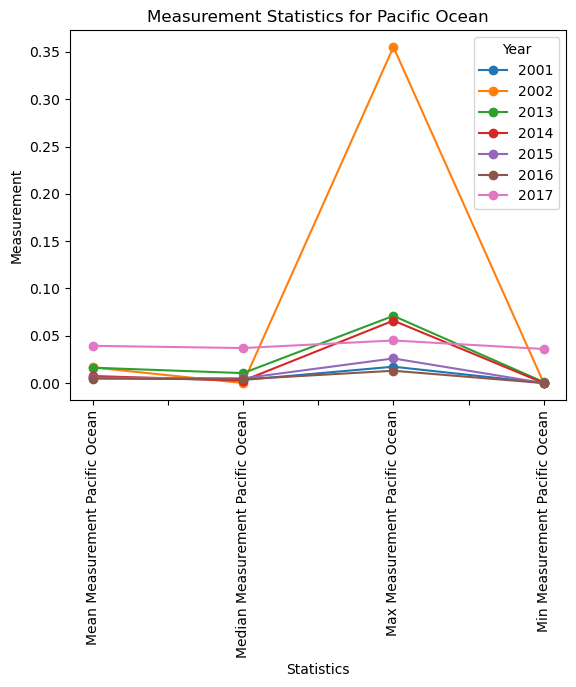

In [12]:
# Transpose the pacific_statistics DataFrame
pacific_stats_transposed = pacific_statistics.transpose()

# Create a line plot with multiple lines
pacific_stats_transposed.plot(kind="line", marker="o")

plt.xlabel("Statistics")
plt.ylabel("Measurement")
plt.xticks(rotation="vertical")
plt.title("Measurement Statistics for Pacific Ocean")

# Show the plot
plt.show()

In [13]:
pacific_map = folium.Map(location=[pacific_df["Latitude"].mean(), pacific_df["Longitude"].mean()], zoom_start=10)

# Add a marker for each point in the DataFrame
for index, row in pacific_df.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]]).add_to(pacific_map)

# Display the map
pacific_map

In [14]:
# per region
# Calculate mean measurement per region
measurement_per_regions = clean_microplastics.dropna().groupby("Regions")["Measurement"].mean()

# Regions Statistics
regions_mean = clean_microplastics.groupby(["Regions"]).mean()["Measurement"]
regions_median = clean_microplastics.groupby(["Regions"]).median()["Measurement"]
regions_max = clean_microplastics.groupby(["Regions"]).max()["Measurement"]
regions_min = clean_microplastics.groupby(["Regions"]).min()["Measurement"]

regions_statistics = pd.DataFrame ({
    "Mean Measument per Region": regions_mean,
    "Median Measument per Region": regions_median,
    "Max Measument per Region": regions_max,
    "Min Measument per Region": regions_min})

regions_statistics.head()

,Mean Measument per Region,Median Measument per Region,Max Measument per Region,Min Measument per Region
Regions,,,,
Bering Sea,0.030250,0.0365,0.045000,0.003
Caribbean Sea,0.005581,0.0000,0.388768,0.000
Channel Islands National Marine Sanctuary,0.000667,0.0000,0.002000,0.000
Coastal Waters of Florida,0.006187,0.0030,0.043196,0.000
Coastal Waters of Southeast Alaska and British Columbia,0.004370,0.0020,0.032000,0.000


In [31]:
california_df = clean_microplastics.loc[(clean_microplastics["Latitude"] >= 32.5) & (clean_microplastics["Latitude"] <= 42) & (clean_microplastics["Longitude"] >= -117.5) & (clean_microplastics["Longitude"] <= -124)]

california_df

,Date,Latitude,Longitude,Oceans,Regions,Measurement,Unit,Sampling Method,Year


Text(0.5, 1.0, 'Mean Microplastics Measurement by Region')

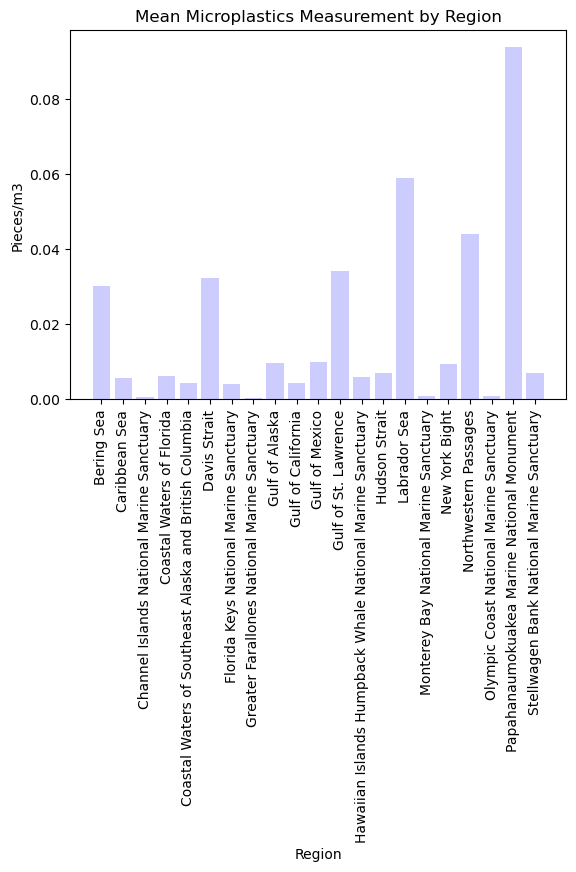

In [15]:
# Create Barplot
plt.bar(measurement_per_regions.index, measurement_per_regions.values, color='blue', alpha=0.2)

# set axis labels and title
plt.xlabel('Region')
plt.ylabel('Pieces/m3')
plt.xticks(rotation="vertical")
plt.title('Mean Microplastics Measurement by Region')

In [16]:
# Year Statistics
year_mean = clean_microplastics.groupby(["Year"]).mean()["Measurement"]
year_median = clean_microplastics.groupby(["Year"]).median()["Measurement"]
year_max = clean_microplastics.groupby(["Year"]).max()["Measurement"]
year_min = clean_microplastics.groupby(["Year"]).min()["Measurement"]

year_statistics = pd.DataFrame ({
    "Mean Measument per Year": year_mean,
    "Median Measument per Year": year_median,
    "Max Measument per Year": year_max,
    "Min Measument per Year": year_min})

year_statistics

,Mean Measument per Year,Median Measument per Year,Max Measument per Year,Min Measument per Year
Year,,,,
1972,0.016419,0.003000,0.117000,0.0
1973,0.022286,0.002000,0.221000,0.0
1986,0.027291,0.000000,0.177776,0.0
1987,0.023399,0.004320,0.820736,0.0
1989,0.024941,0.004320,0.535636,0.0
1990,0.025754,0.006480,0.794816,0.0
1991,0.019063,0.004320,0.356372,0.0
1992,0.017570,0.004320,0.280776,0.0
1993,0.020521,0.002160,0.449244,0.0


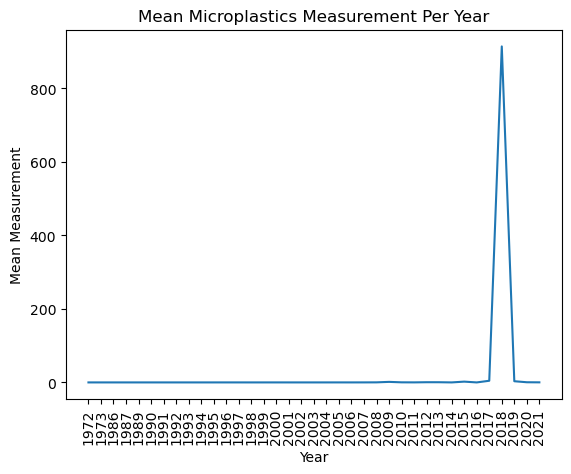

In [17]:
#display results for microplastics over time
year_ocean_df = clean_microplastics.groupby("Year")["Measurement"].mean()
year_ocean_df = year_ocean_df.reset_index()

# Create line plot
plt.plot(year_ocean_df['Year'], year_ocean_df['Measurement'])

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Mean Measurement')
plt.xticks(rotation="vertical")
plt.title('Mean Microplastics Measurement Per Year')

# Display plot
plt.show()

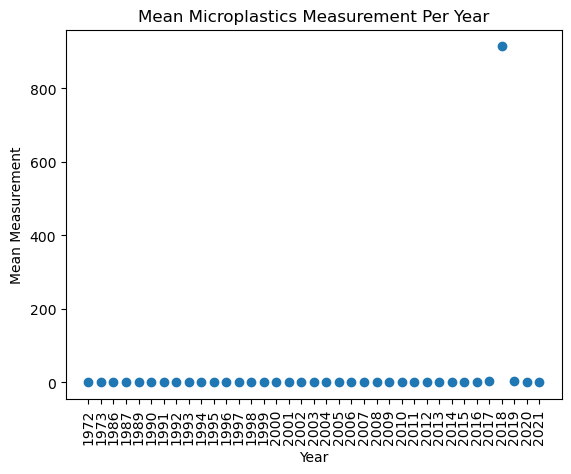

In [18]:
# Create line plot
plt.scatter(year_ocean_df['Year'], year_ocean_df['Measurement'])

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Mean Measurement')
plt.xticks(rotation="vertical")
plt.title('Mean Microplastics Measurement Per Year')

# Display plot
plt.show()